In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import time

## Dijkstra and Bellman Ford

In [12]:
def generate_matrix(nodes=100, edges=200):    
    matrix = np.zeros((nodes,nodes), dtype=int)

    for _ in range(edges):
        x = np.random.randint(nodes)
        y = np.random.randint(nodes)
        if x != y and matrix[x, y] == 0:
            weight = np.random.randint(100)
            matrix[x, y] = weight
            matrix[y, x] = weight
    
    return matrix

In [22]:
matrix = generate_matrix(100, 500)

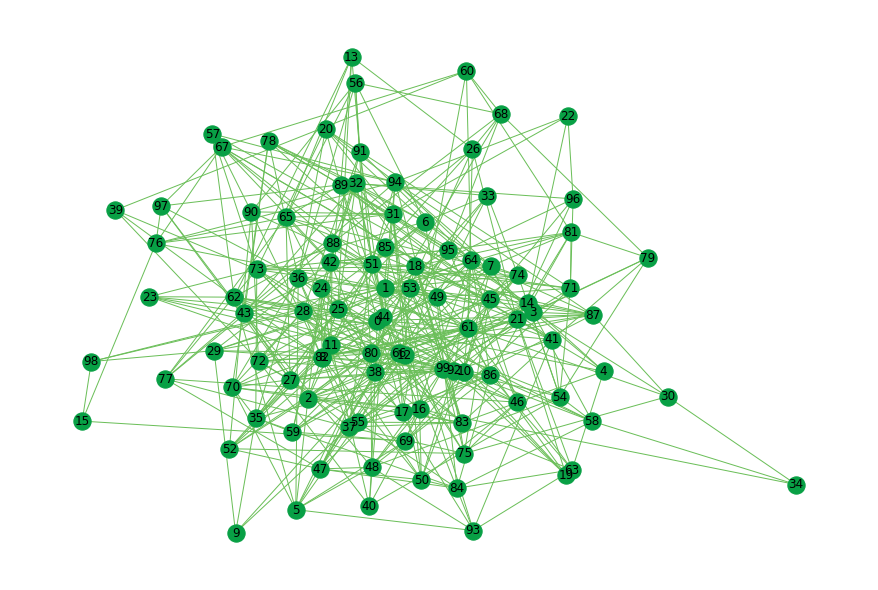

In [32]:
G = nx.from_numpy_matrix(matrix)
plt.figure(figsize=(12,8))
nx.draw(G, node_color='#08A045', edge_color='#6BBF59', with_labels=True)

In [33]:
matrix_df = pd.DataFrame(matrix)
matrix_df.to_csv('matrix.csv', index=False)

### Adjacency Matrix

In [34]:
matrix_df = pd.read_csv('matrix.csv')
print(matrix_df.iloc[:15, :15])

     0  1   2   3   4   5   6   7   8  9  10  11  12  13  14
0    0  0   0   0   0   0   0   0   0  0  92   0   0   0   0
1    0  0   0   0   0   0   0   0   0  0   0   0   0   0   0
2    0  0   0   1   0  55   0   0   0  0   0   0  78   0   0
3    0  0   1   0   0   0   0   0  36  0   0   0   0   0  34
4    0  0   0   0   0   0  55   0   0  0   0   0   0   0  48
5    0  0  55   0   0   0   0   0   0  0   0   0   0   0   0
6    0  0   0   0  55   0   0   1   0  0   0   0   0   0   0
7    0  0   0   0   0   0   1   0   0  0  57   9   0   0   0
8    0  0   0  36   0   0   0   0   0  0  93   0   0   0   0
9    0  0   0   0   0   0   0   0   0  0   0   0   0   0   0
10  92  0   0   0   0   0   0  57  93  0   0   0   0   0  72
11   0  0   0   0   0   0   0   9   0  0   0   0   0   0   0
12   0  0  78   0   0   0   0   0   0  0   0   0   0   0   0
13   0  0   0   0   0   0   0   0   0  0   0   0   0   0   0
14   0  0   0  34  48   0   0   0   0  0  72   0   0   0   0


### Dijkstra

In [49]:
times = []

for _ in range(10):
    start = time.time()
    print(nx.dijkstra_path(G, 5, 58, 'weight'))
    times.append(time.time() - start)

print(f'Dijkstra\'s avg time: {np.mean(times)}')

[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
Dijkstra's avg time: 0.0006385087966918945


### Bellman-Ford

In [52]:
b_times = []

for _ in range(10):
    start = time.time()
    print(nx.bellman_ford_path(G, 5, 58, 'weight'))
    b_times.append(time.time() - start)

print(f'Bellman Ford\'s avg time: {np.mean(b_times)}')

[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
[5, 18, 81, 28, 58]
Bellman Ford's avg time: 0.0020949602127075194


## A* with obstacle

In [156]:
x, y = 10, 20
obstacle = 40

# generate graph
G = nx.grid_2d_graph(x, y)
nodes = list(G.nodes())

# remove some nodes to give obstacles
nds = []
while len(nds) < 40:
    node_to_remove = np.random.randint(len(nodes))
    if nodes[node_to_remove] not in nds:
        nds.append(nodes[node_to_remove])

G.remove_nodes_from(nds)
nodes = list(G.nodes())

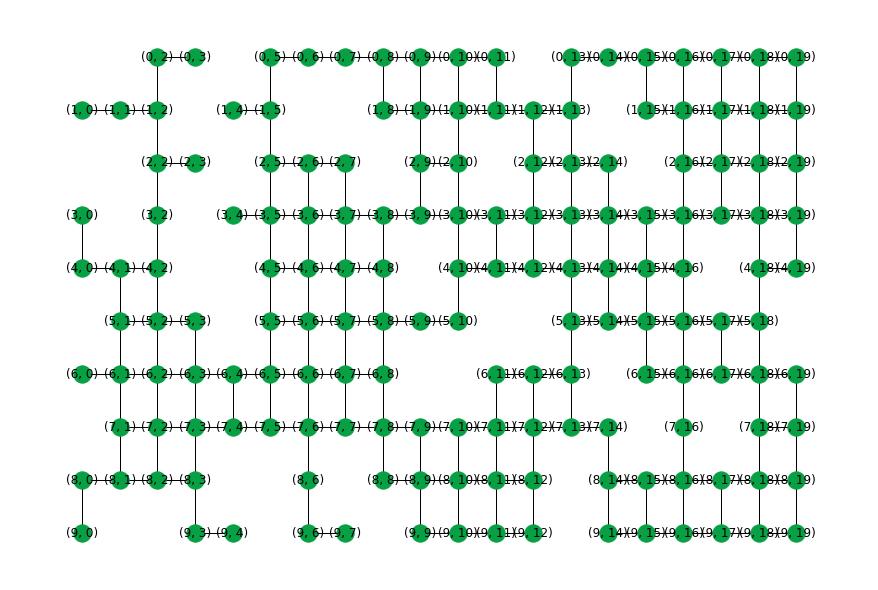

In [157]:
pos = {(x,y):(y,-x) for x, y in G.nodes()}

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='#08A045')

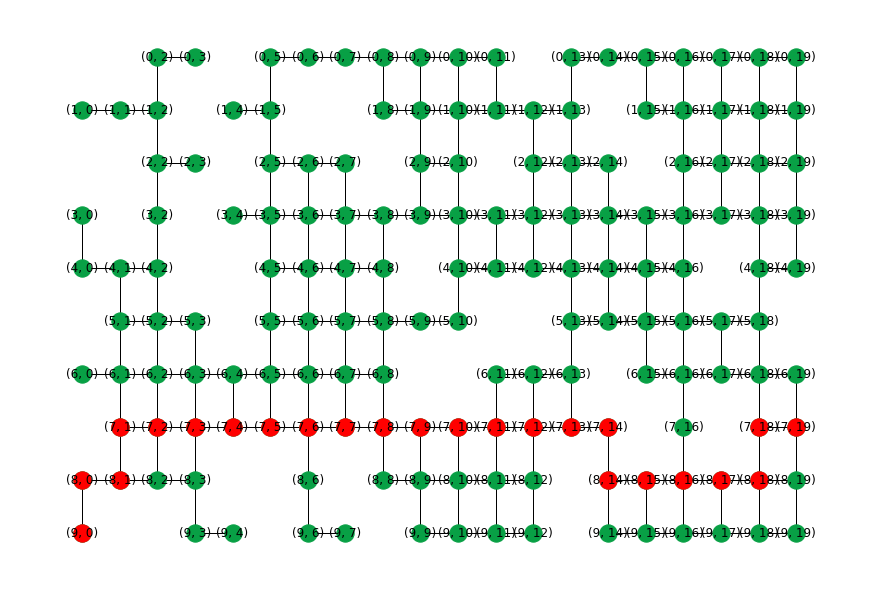

In [168]:
pos = {(x,y):(y,-x) for x, y in G.nodes()}
path = nx.astar_path(G, (9,0), (7,19))
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='#08A045')
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')

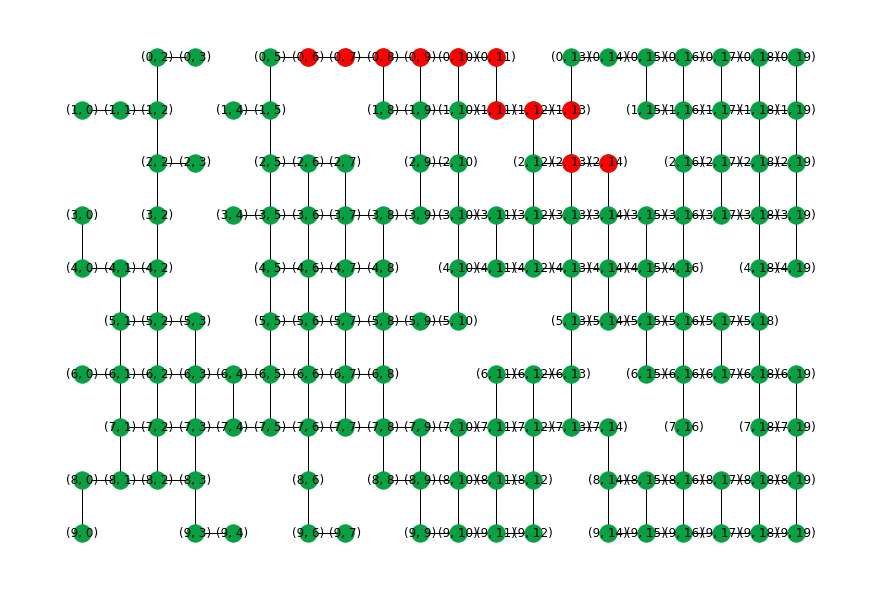

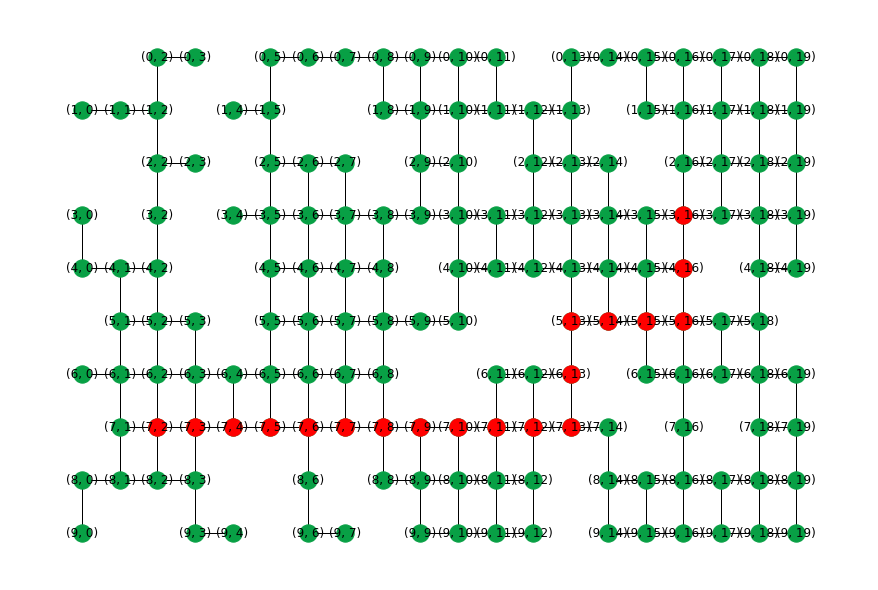

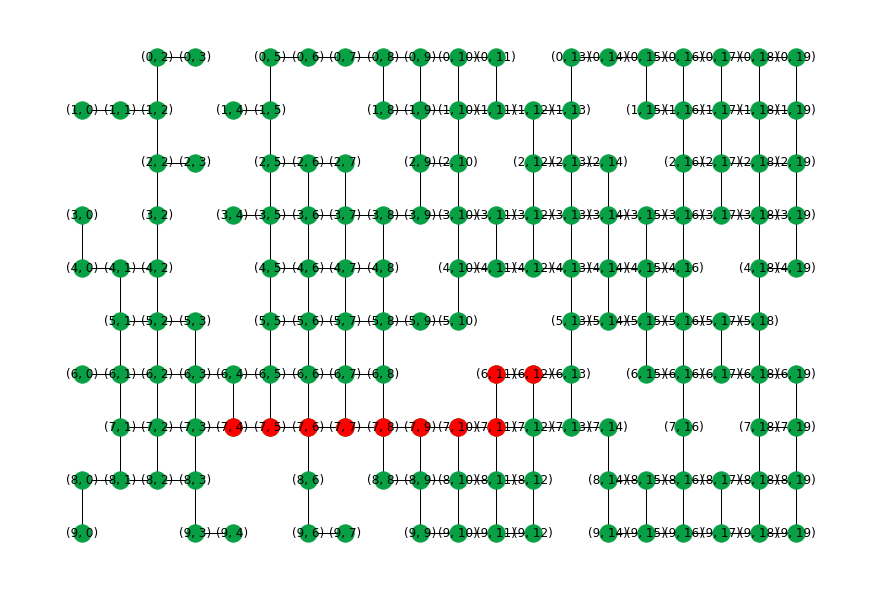

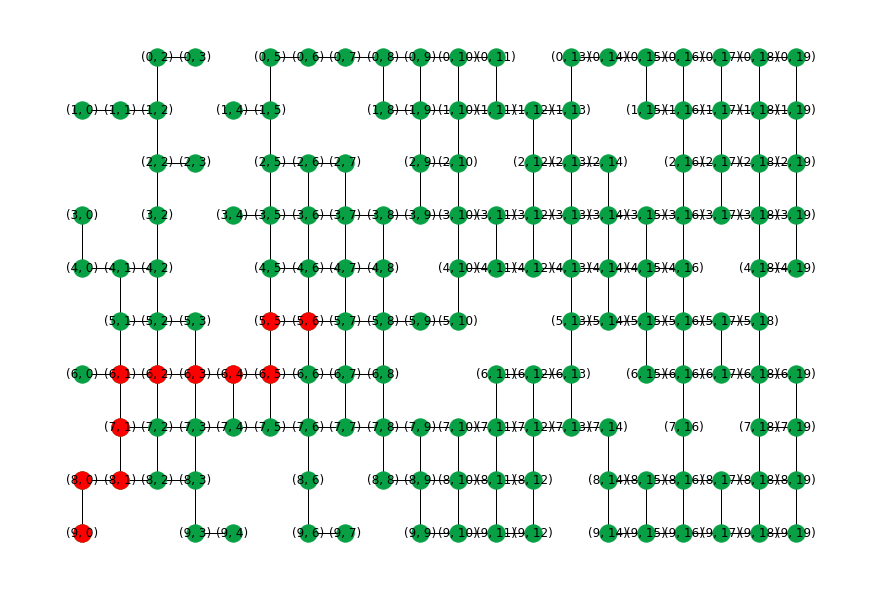

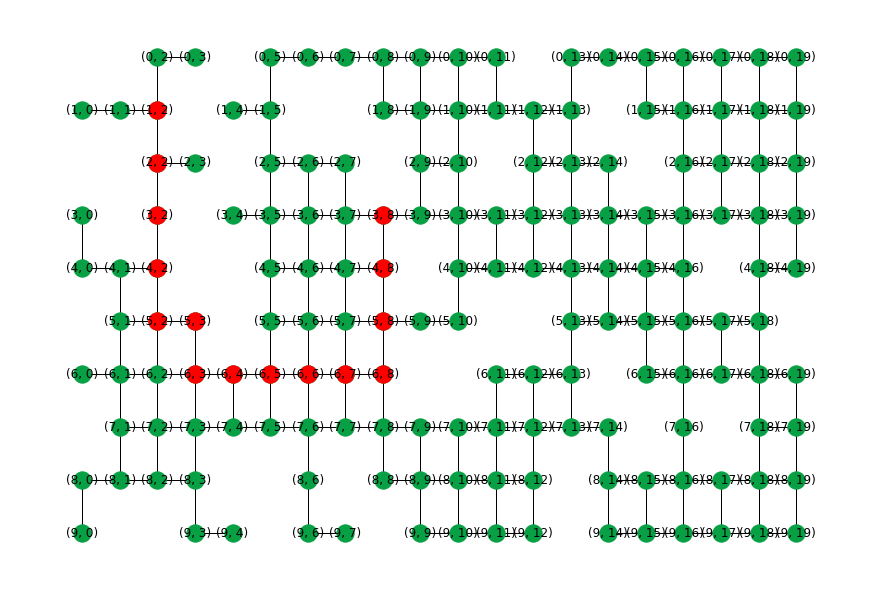

In [171]:
times = []

for _ in range(5):
    # generate start and end node
    source = nodes[np.random.randint(len(nodes))]
    target = nodes[np.random.randint(len(nodes))]

    start = time.time()
    path = nx.astar_path(G, source, target)
    times.append(time.time() - start)

    # draw graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='#08A045')
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
    plt.show()

In [172]:
print(f'A*\'s avg time: {np.mean(times)}')

A*'s avg time: 0.0005268573760986329
